File ''question2.txt' created successfully.


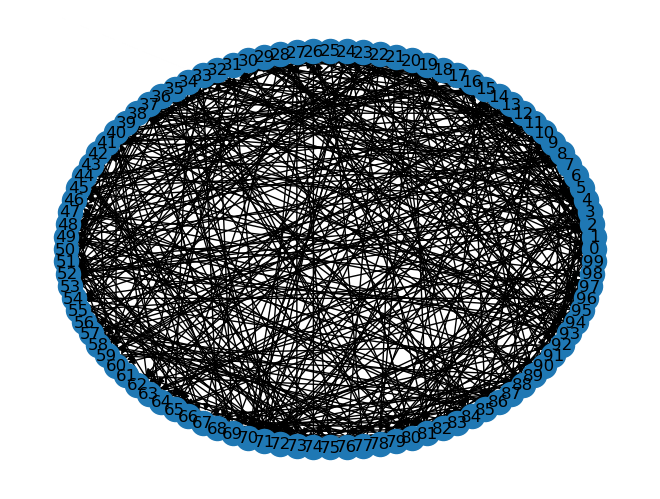

In [3]:
import random
import networkx as nx

# Function to generate random link data
def generate_link_data(num_nodes):
    
    link_data = {}
    for node in range(num_nodes):
        num_links = random.randint(1, min(10, num_nodes - 1)) 
        links = random.sample(range(num_nodes), num_links)  
        links = [link for link in links if link != node]  
        link_data[node] = links
    link_graph = nx.DiGraph(link_data)
    labels = dict((n, str(n)) for n in link_graph.nodes())
    nx.draw_circular(link_graph, labels = labels)
    return link_data

# Function to write link data to a text file
def write_link_data_to_file(link_data, filename):
    with open(filename, 'w') as file:
        for node, links in link_data.items():
            file.write("{}: {}\n".format(node, links))

# Main function
def main():
    num_nodes = 100
    link_data = generate_link_data(num_nodes)

    # Write link data to a file
    write_link_data_to_file(link_data, 'question2.txt')

    print("File ''question2.txt' created successfully.")

if __name__ == "__main__":
    main()